In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn import preprocessing
from sklearn.ensemble import BaggingRegressor
import math, os, random 
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, make_scorer, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Plot the learning curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5), squeeze=False)

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    print("the shape of train_scores_mean", train_scores_mean.shape)
    print(train_scores_mean)
    print("the shape of test_scores_mean", test_scores_mean.shape)
    print(test_scores_mean)
    # Plot fit_time vs score
    # axes[0].grid()
    # axes[0].fill_between(fit_times_mean, train_scores_mean - train_scores_std,
    #                      train_scores_mean + train_scores_std, alpha=0.1,
    #                      color="r")
    # axes[0].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
    #                      test_scores_mean + test_scores_std, alpha=0.1,
    #                      color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Testing score")
    axes[0].legend(loc="best")

    return plt


In [3]:
# Load the train data and test data
def load_data():
    
    files = os.listdir("Data")
    filename = files[-1]
    train_data = pd.read_csv("./Data/{}".format(filename),header=None)
    train_output = train_data[len(train_data.columns)-1]
    train_num = train_data.shape[0]
    del train_data[len(train_data.columns)-1]

    file_list = files[:-1]
    test_data = pd.DataFrame()
    for filename in file_list:
        df = pd.read_csv("./Data/{}".format(filename),header=None)
        test_data = pd.concat([test_data, df], axis=0)
    test_output = test_data[len(test_data.columns)-1]
    del test_data[len(test_data.columns)-1]

    data_X = pd.concat([train_data, test_data], axis=0)
    data_Y = pd.concat([train_output, test_output], axis=0)

    return data_X, data_Y, train_num

In [4]:
#  define the models,which are baggings of MLP, KNN, RBF Network, Model Tree(M5P, REF), Linear Regression
def Models():
    # Initialize the models
    linear_reg = LinearRegression()
    knn_reg = KNeighborsRegressor(n_neighbors=20)
    regressors = [linear_reg]
    regressor_names = ["Linear Regression"]

    # Bagging of the models
    for index in range(len(regressors)):

        regEnsemble = BaggingRegressor(base_estimator=regressors[index], n_estimators=100, max_samples=1.0, max_features=100, oob_score=False, random_state=0)
        regressors[index] = regEnsemble
        regressor_names[index] += " Ensemble"


    return regressors, regressor_names


In [5]:
def main():
    fig, axes = plt.subplots(1, 1, figsize=(10, 15), squeeze=False)
    
    data_X, data_Y, train_num = load_data()
    print(train_num, data_X.shape[0])
    train_indices = [list(range(0, train_num))]
    test_indices =  [list(range(train_num, data_X.shape[0]))]
    custom_cv = zip(train_indices, test_indices)
    estimators, estimator_names = Models()
    # cnt = 0
    # for estimator, estimator_name in zip(estimators, estimator_names):
        
    #     print("******" + estimator_name + "******")
        
    #     plot_learning_curve(estimator=estimator, title=estimator_name, X=data_X, y=data_Y, axes=axes[:,cnt], cv=custom_cv, train_sizes=np.linspace(.1, 0.87, 5))
    #     cnt += 1
    rf = RandomForestRegressor(n_estimators=100, max_features=100)
    plot_learning_curve(estimator=rf, title="Random Forest", X=data_X, y=data_Y, axes=axes[:,0], cv=custom_cv, train_sizes=np.linspace(.1, 0.87, 50))
    plt.show()

52397 60021
the shape of train_scores_mean (50,)
[ 26.60170552  37.36414979  42.62450476  35.57305813  35.93026958
  33.42460349  40.08894105  35.43065977  59.62242314 180.81043868
 179.24883556 171.61975908 171.23339764 158.19257085 150.16125891
 144.6131625  139.47428588 144.24304189 139.56114485 137.65207845
 129.139888   133.52205866 129.34684714 122.90731453 125.62390662
 117.23831384 113.06067144 114.62577907 108.52095174 109.94169053
 103.36609087 102.24747742 106.13506527 100.75903041  99.18765257
 100.15682061  97.601145    96.34202732  94.60673603  92.53947849
 118.82782937 116.83861166 115.12497578 116.81286283 111.85878238
 108.89683822 108.53191635 108.8705119  106.61370963 104.55681411]
the shape of test_scores_mean (50,)
[696.83447944 681.23237622 676.51173302 658.57434287 661.74254947
 659.94345343 661.27543346 665.85731556 684.84519258 572.69033633
 595.49509962 616.17780417 548.09036779 550.95425318 582.48791063
 562.9135569  524.35598419 536.82808655 524.76478383 558

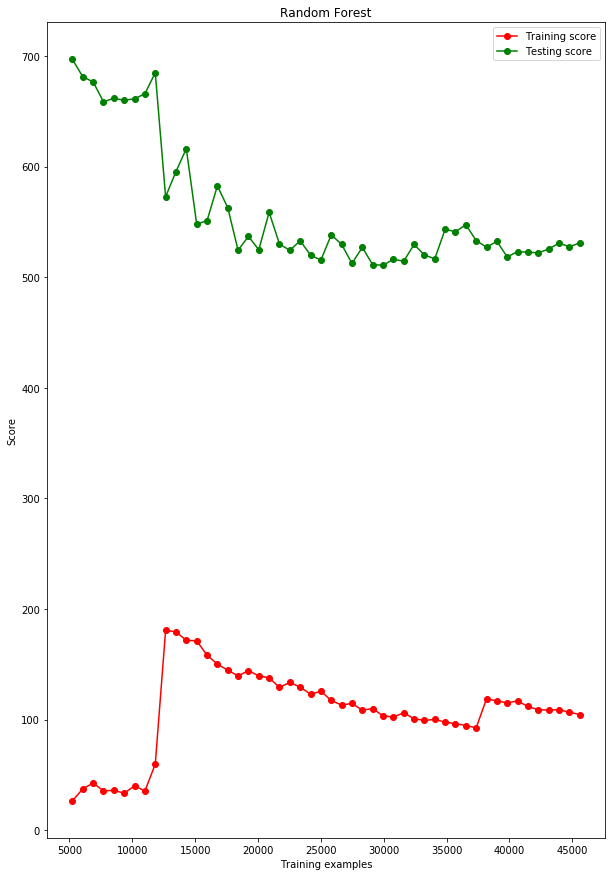

In [6]:

if __name__ == "__main__":
    main()